## Import Modules

In [ ]:
import requests
import json

# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# All Breeds Endpoint

In [2]:
# call Dog API - all breeds endpoint
url = "https://api.thedogapi.com/v1/breeds"
payload={}
files={}
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("GET", url, headers=headers, data=payload, files=files)

df = pd.read_json(response.text)

# save data to json file
# with open('pet_raw.json', 'w', encoding='utf-8') as f:
#     json.dump(response.json(), f, ensure_ascii=False, indent=4)

# save raw response to csv
# df.to_csv('pet_raw.csv', index='False')

## Clean Data

In [11]:
df.loc[:,'weight'].str.strip('{}\'')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
167   NaN
168   NaN
169   NaN
170   NaN
171   NaN
Name: weight, Length: 172, dtype: float64

In [15]:
pd.concat([df.drop('weight', axis=1), pd.DataFrame(df['weight'].tolist())], axis=1)

,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,image,country_code,description,history,imperial,metric
0,"{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,"{'id': 'BJa4kxc4X', 'width': 1600, 'height': 1...",NaN,NaN,NaN,6 - 13,3 - 6
1,"{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,"{'id': 'hMyT4CDXR', 'width': 606, 'height': 38...",AG,NaN,NaN,50 - 60,23 - 27
2,"{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,"{'id': 'rkiByec47', 'width': 500, 'height': 33...",NaN,NaN,NaN,44 - 66,20 - 30
3,"{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,"{'id': '1-7cgoZSh', 'width': 645, 'height': 43...",NaN,NaN,NaN,40 - 65,18 - 29
4,"{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,"{'id': '26pHT3Qk7', 'width': 600, 'height': 47...",NaN,NaN,NaN,90 - 120,41 - 54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,"{'imperial': '13 - 16', 'metric': '33 - 41'}",259,Wire Fox Terrier,"Vermin hunting, fox bolting",NaN,13 – 14 years,"Fearless, Friendly, Bold, Keen, Alert, Quick",NaN,SJ6f2g9EQ,"{'id': 'SJ6f2g9EQ', 'width': 1000, 'height': 7...",NaN,NaN,England,15 - 19,7 - 9
168,"{'imperial': '20 - 24', 'metric': '51 - 61'}",260,Wirehaired Pointing Griffon,"Gundog, ""swamp-tromping"", Flushing, pointing, ...",Sporting,12 - 14 years,"Loyal, Gentle, Vigilant, Trainable, Proud",NaN,Bkam2l9Vm,"{'id': 'Bkam2l9Vm', 'width': 2328, 'height': 1...",NaN,NaN,NaN,45 - 70,20 - 32
169,"{'imperial': '21.5 - 25', 'metric': '55 - 64'}",261,Wirehaired Vizsla,NaN,Sporting,12 - 14 years,NaN,NaN,r1I4hl5Em,"{'id': 'r1I4hl5Em', 'width': 1024, 'height': 7...",NaN,NaN,NaN,45 - 65,20 - 29
170,"{'imperial': '10 - 23', 'metric': '25 - 58'}",262,Xoloitzcuintli,NaN,Non-Sporting,12 - 14 years,"Cheerful, Alert, Companionable, Intelligent, P...",NaN,HkNS3gqEm,"{'id': 'HkNS3gqEm', 'width': 1500, 'height': 1...",NaN,NaN,NaN,9 - 31,4 - 14


## Individual Breed Endpoint

In [40]:
import requests

url = "https://api.thedogapi.com/v1/breeds/20"
payload={}
files={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload, files=files)

dog = pd.read_json(response.text)

In [41]:
dog

,weight,height,id,name,breed_group,life_span
imperial,25 - 70,varies,20,Aussiedoodle,Mixed,10 - 12 years
metric,11 - 32,varies,20,Aussiedoodle,Mixed,10 - 12 years


# EDA

In [2]:
pet_df = pd.read_csv('pet_cleaned.csv', index_col = 'id')
pet_df

,imperial_weight_min,imperial_weight_max,metric_weight_min,metric_weight_max,imperial_height_min,imperial_height_max,metric_height_min,metric_height_max,name,bred_for,breed_group,min_life_span,max_life_span,temperament,origin,reference_image_id,image,country_code
id,,,,,,,,,,,,,,,,,,
1,6.0,13.0,3,6,9.0,11.5,23,29,Affenpinscher,"Small rodent hunting, lapdog",Toy,10,12,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,"{'id': 'BJa4kxc4X', 'width': 1600, 'height': 1...",NaN
2,50.0,60.0,23,27,25.0,27.0,64,69,Afghan Hound,Coursing and hunting,Hound,10,13,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,"{'id': 'hMyT4CDXR', 'width': 606, 'height': 38...",AG
3,44.0,66.0,20,30,30.0,30.0,76,76,African Hunting Dog,A wild pack animal,NaN,11,11,"Wild, Hardworking, Dutiful",NaN,rkiByec47,"{'id': 'rkiByec47', 'width': 500, 'height': 33...",NaN
4,40.0,65.0,18,29,21.0,23.0,53,58,Airedale Terrier,"Badger, otter hunting",Terrier,10,13,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,"{'id': '1-7cgoZSh', 'width': 645, 'height': 43...",NaN
5,90.0,120.0,41,54,28.0,34.0,71,86,Akbash Dog,Sheep guarding,Working,10,12,"Loyal, Independent, Intelligent, Brave",NaN,26pHT3Qk7,"{'id': '26pHT3Qk7', 'width': 600, 'height': 47...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,15.0,19.0,7,9,13.0,16.0,33,41,Wire Fox Terrier,"Vermin hunting, fox bolting",NaN,13,14,"Fearless, Friendly, Bold, Keen, Alert, Quick",NaN,SJ6f2g9EQ,"{'id': 'SJ6f2g9EQ', 'width': 1000, 'height': 7...",NaN
260,45.0,70.0,20,32,20.0,24.0,51,61,Wirehaired Pointing Griffon,"Gundog, ""swamp-tromping"", Flushing, pointing, ...",Sporting,12,14,"Loyal, Gentle, Vigilant, Trainable, Proud",NaN,Bkam2l9Vm,"{'id': 'Bkam2l9Vm', 'width': 2328, 'height': 1...",NaN
261,45.0,65.0,20,29,21.5,25.0,55,64,Wirehaired Vizsla,NaN,Sporting,12,14,NaN,NaN,r1I4hl5Em,"{'id': 'r1I4hl5Em', 'width': 1024, 'height': 7...",NaN


In [54]:
pet_df['imperial_weight_mid'] = (pet_df['imperial_weight_max'] + pet_df['imperial_weight_max']) / 2
pet_df['imperial_height_mid'] = (pet_df['imperial_height_max'] + pet_df['imperial_height_max']) / 2
pet_df['metric_weight_mid'] = (pet_df['metric_weight_max'] + pet_df['metric_weight_max']) / 2
pet_df['metric_height_mid'] = (pet_df['metric_height_max'] + pet_df['metric_height_max']) / 2

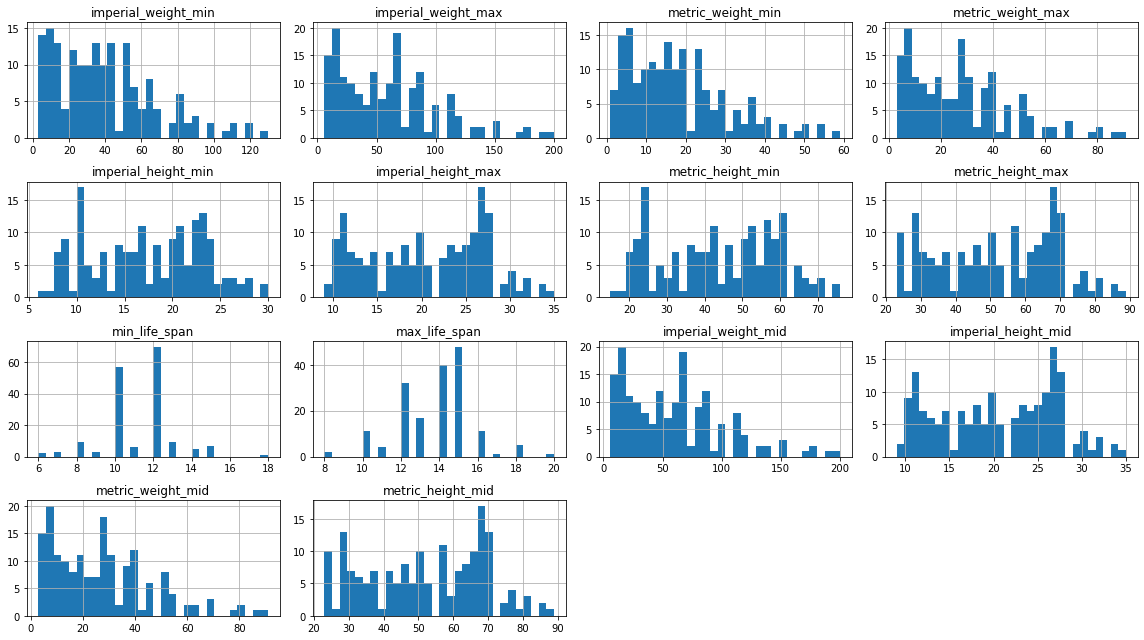

In [56]:
pet_df.hist(figsize=(16,9),bins=30)
plt.tight_layout()

In [43]:
pet_df.groupby('breed_group')['name'].count()

breed_group
Herding         21
Hound           22
Mixed            2
Non-Sporting    17
Sporting        26
Terrier         19
Toy             18
Working         30
Name: name, dtype: int64

<AxesSubplot:>

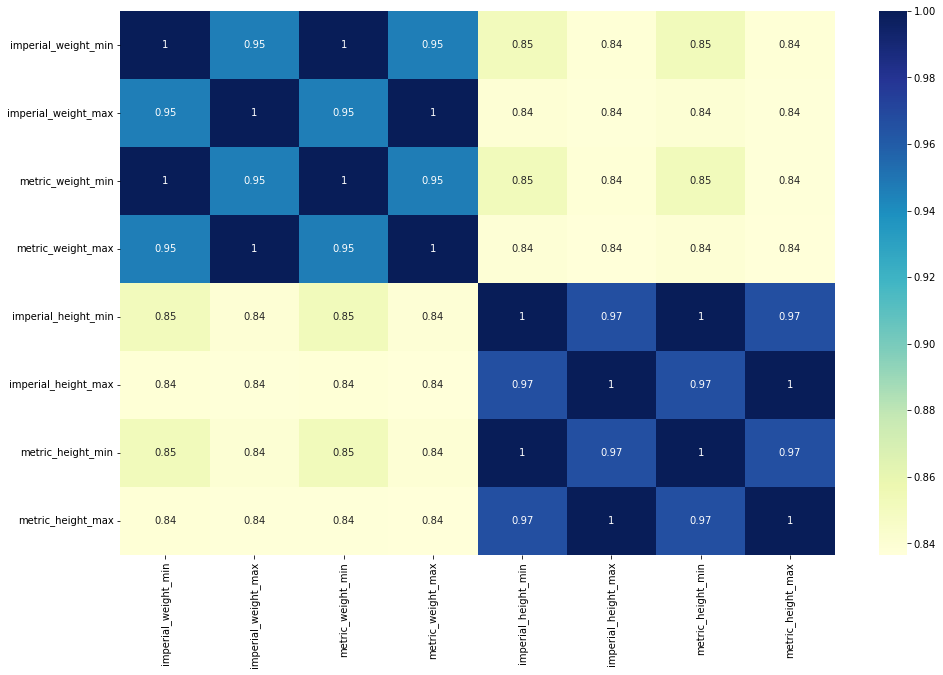

In [48]:
# cor = pet_df[['imperial_weight_min', 'imperial_weight_max', 'metric_weight_min','metric_weight_max', 'imperial_height_min', 'imperial_height_max', 'metric_height_min', 'metric_height_max']].corr()

# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(cor, annot = True, ax = ax, cmap="YlGnBu")

## Binning

In [ ]:
# binning by height
pd.cut(pet_df[column], bins = [ ], labels = [ ] )

In [ ]:
# binning by weight

In [ ]:
# binning by life span

## Plots

Text(0, 0.5, 'Frequency')

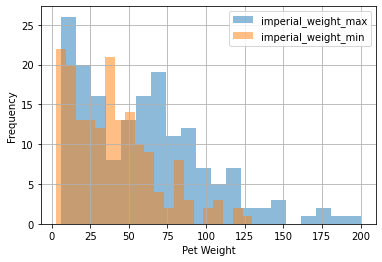

In [14]:
# histogram of weight (imperial)

weight_hist = pet_df['imperial_weight_max'].hist(bins = 20, alpha=0.5, legend = True)
weight_hist = pet_df['imperial_weight_min'].hist(bins = 20, alpha=0.5, legend = True)
weight_hist.set_xlabel("Pet Weight")
weight_hist.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

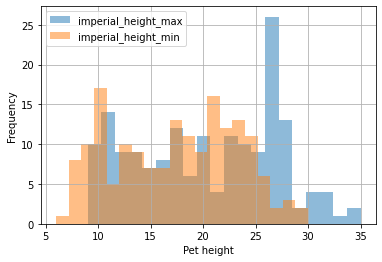

In [18]:
# histogram of height (imperial)

height_hist = pet_df['imperial_height_max'].hist(bins = 20, alpha=0.5, legend = True)
height_hist = pet_df['imperial_height_min'].hist(bins = 20, alpha=0.5, legend = True)
height_hist.set_xlabel("Pet height")
height_hist.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

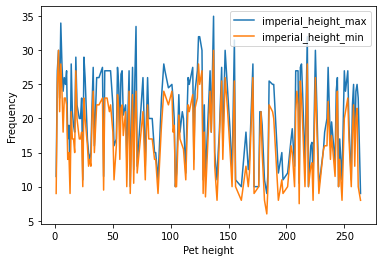

In [21]:
# plot of height (imperial)

height_plot = pet_df['imperial_height_max'].plot(legend = True)
height_plot = pet_df['imperial_height_min'].plot(legend = True)
height_plot.set_xlabel("Pet height")
height_plot.set_ylabel("Frequency")

In [33]:
fig = px.line(pet_df.sort_values('imperial_weight_max'), x='imperial_weight_max', y='name', markers=True)
fig.show()


In [27]:
pet_df

,imperial_weight_min,imperial_weight_max,metric_weight_min,metric_weight_max,imperial_height_min,imperial_height_max,metric_height_min,metric_height_max,name,bred_for,breed_group,min_life_span,max_life_span,temperament,origin,reference_image_id,image,country_code
id,,,,,,,,,,,,,,,,,,
1,6.0,13.0,3,6,9.0,11.5,23,29,Affenpinscher,"Small rodent hunting, lapdog",Toy,10,12,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,"{'id': 'BJa4kxc4X', 'width': 1600, 'height': 1...",NaN
2,50.0,60.0,23,27,25.0,27.0,64,69,Afghan Hound,Coursing and hunting,Hound,10,13,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,"{'id': 'hMyT4CDXR', 'width': 606, 'height': 38...",AG
3,44.0,66.0,20,30,30.0,30.0,76,76,African Hunting Dog,A wild pack animal,NaN,11,11,"Wild, Hardworking, Dutiful",NaN,rkiByec47,"{'id': 'rkiByec47', 'width': 500, 'height': 33...",NaN
4,40.0,65.0,18,29,21.0,23.0,53,58,Airedale Terrier,"Badger, otter hunting",Terrier,10,13,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,"{'id': '1-7cgoZSh', 'width': 645, 'height': 43...",NaN
5,90.0,120.0,41,54,28.0,34.0,71,86,Akbash Dog,Sheep guarding,Working,10,12,"Loyal, Independent, Intelligent, Brave",NaN,26pHT3Qk7,"{'id': '26pHT3Qk7', 'width': 600, 'height': 47...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,15.0,19.0,7,9,13.0,16.0,33,41,Wire Fox Terrier,"Vermin hunting, fox bolting",NaN,13,14,"Fearless, Friendly, Bold, Keen, Alert, Quick",NaN,SJ6f2g9EQ,"{'id': 'SJ6f2g9EQ', 'width': 1000, 'height': 7...",NaN
260,45.0,70.0,20,32,20.0,24.0,51,61,Wirehaired Pointing Griffon,"Gundog, ""swamp-tromping"", Flushing, pointing, ...",Sporting,12,14,"Loyal, Gentle, Vigilant, Trainable, Proud",NaN,Bkam2l9Vm,"{'id': 'Bkam2l9Vm', 'width': 2328, 'height': 1...",NaN
261,45.0,65.0,20,29,21.5,25.0,55,64,Wirehaired Vizsla,NaN,Sporting,12,14,NaN,NaN,r1I4hl5Em,"{'id': 'r1I4hl5Em', 'width': 1024, 'height': 7...",NaN


In [ ]:
def get_histogram(column):
    return